## Project Description
Weather Data of record high and record low temperatures over a 10 year period is plotted for each calendar day. An overlay scatter plot shows the record break in the temperature in the following year.

## Data Resource
Data is collected from [Daily Global Historical Climatology Network](https://www1.ncdc.noaa.gov/pub/data/ghcn/daily/readme.txt) (GHCN-Daily). The GHCN-Daily is comprised of daily climate records from thousands of land surface stations across the globe.
 
The Weather data is for Ann Arbor area near Michigen United States. It consists of a time period ranging from 2005-2015. The data comes from various weather monitoring stations installed at different locations. Each data row corresponds to a single observation of weather data for a single day from one station. The data columns represent station ID, Date, Temperature Value and Element variable which has two possible values 'TMAX' and 'TMIN' representing weather the data reading is for maximum or minimum temperature recorded for the day.

The data consists of 165k rows.

## Methodology

1. **Preprocessing Data:**  Some data prepocessing is required to bring the data in required form. First temperature data values are divided by 10 since they are given in tenths of values. Leap dates are dropped for the purpose of visualizing the data.
2. **Splitting Data:** Data needs to be split into two time periods. First, 10 year time period from 2005 to 2014 and second, 2015 for making an overlay scatter plot of record break. Each dataset will be split further based on maximum temperature and minimum temperature values recorded in a day. 
3. **Grouping Data:** To find the record high and record low for a given calender day over the 10 year period the data will be grouped by calender day and the maximum and minimum temperature for that day will be extracted. For the year 2015, the data will be grouped in the same way and then it will be compared with the 10 year data to see if any record is broken for a given calender day. 
4. **Visualizing Data:** Finally, the data is visualized by making line plots for record high and record low temperatures for all 365 calender days. An overlay scatter plot is made to show any record that is broken in 2015 for a given calender day.

In [128]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [289]:
df = pd.read_csv('data.csv')
df.head()

,ID,Date,Element,Data_Value
0,USW00094889,2014-11-12,TMAX,22
1,USC00208972,2009-04-29,TMIN,56
2,USC00200032,2008-05-26,TMAX,278
3,USC00205563,2005-11-11,TMAX,139
4,USC00200230,2014-02-27,TMAX,-106


In [290]:
df['Data_Value'] = df['Data_Value']/10 # because temperature is given in tenths of values

## 1. get day and month combined to be used as index later for the purpose of plotting

In [291]:
df['Date'] = pd.to_datetime(df['Date'])

In [292]:
df.dtypes

ID                    object
Date          datetime64[ns]
Element               object
Data_Value           float64
dtype: object

In [293]:
def get_day(x):
    return x.day

def get_month(x):
    return x.month

In [294]:
df['Day'] = df['Date'].apply(get_day)
df['Month'] = df['Date'].apply(get_month)

In [295]:
# df['Day'] = df['Day'].astype(str)
# df['Month'] = df['Month'].astype(str)
# df['monthday'] = df['Month'].astype(str) + '-' + df['Day'].astype(str) # we do not create this here because the columns don't
# remain in grouped data

In [296]:
df.head()

,ID,Date,Element,Data_Value,Day,Month
0,USW00094889,2014-11-12,TMAX,2.2,12,11
1,USC00208972,2009-04-29,TMIN,5.6,29,4
2,USC00200032,2008-05-26,TMAX,27.8,26,5
3,USC00205563,2005-11-11,TMAX,13.9,11,11
4,USC00200230,2014-02-27,TMAX,-10.6,27,2


In [297]:
df.dtypes

ID                    object
Date          datetime64[ns]
Element               object
Data_Value           float64
Day                    int64
Month                  int64
dtype: object

## 2. drop leap dates

In [298]:
df.shape

(165085, 6)

In [299]:
def get_leapdate(x):
    if not(x.month == 2 and x.day == 29):
        return True
    else:
        return False

In [300]:
df = df[df['Date'].apply(get_leapdate)]

In [301]:
df.shape

(165002, 6)

## 3. Split by year. 2004-2014 and 2015

In [302]:
#df1: 2004-2014 and df2: 2015
df1 = df[df['Date'] < '2015-01-01 00:00:00']
df2 = df[df['Date'] > '2014-12-31 00:00:00']

## 4. Split data into tmax and tmin

In [303]:
# 2004 to 2014
tmax1 = df1[df1['Element'] == 'TMAX']
tmin1 = df1[df1['Element'] == 'TMIN']

# 2015
tmax2 = df2[df2['Element'] == 'TMAX']
tmin2 = df2[df2['Element'] == 'TMIN']

In [392]:
tmax1.shape

(76100, 6)

In [394]:
tmax1 = df[(df['Date'] < '2015-01-01 00:00:00') & (df['Element'] == 'TMAX')]

In [395]:
tmax1.shape

(76100, 6)

## 5. Group data by date to be plotted

In [304]:
tmax1_group = pd.DataFrame(tmax1.groupby(['Month','Day'])['Data_Value'].max())
tmin1_group = pd.DataFrame(tmin1.groupby(['Month','Day'])['Data_Value'].min())

In [305]:
tmin1_group.head()

Data_Value
Month Day            
1     1         -16.0
      2         -26.7
      3         -26.7
      4         -26.1
      5         -15.0

In [306]:
tmax1_group = tmax1_group.reset_index()

In [307]:
tmax1_group.head()

,Month,Day,Data_Value
0,1,1,15.6
1,1,2,13.9
2,1,3,13.3
3,1,4,10.6
4,1,5,12.8


In [308]:
tmax1_group['cDay'] = tmax1_group['Month'].astype(str) + '-' + tmax1_group['Day'].astype(str)
tmax1_group.set_index('cDay', inplace=True)

In [309]:
tmin1_group = tmin1_group.reset_index()
tmin1_group['cDay'] = tmin1_group['Month'].astype(str) + '-' + tmin1_group['Day'].astype(str)
tmin1_group.set_index('cDay', inplace=True)

In [310]:
tmax1_group.head()

,Month,Day,Data_Value
cDay,,,
1-1,1,1,15.6
1-2,1,2,13.9
1-3,1,3,13.3
1-4,1,4,10.6
1-5,1,5,12.8


In [311]:
tmin1_group.head()

,Month,Day,Data_Value
cDay,,,
1-1,1,1,-16.0
1-2,1,2,-26.7
1-3,1,3,-26.7
1-4,1,4,-26.1
1-5,1,5,-15.0


**For 2015 Data find values that are breaking the 10 year record.**

In [312]:
# 2015 Data
tmax2_group = pd.DataFrame(tmax2.groupby(['Month','Day'])['Data_Value'].max())
tmin2_group = pd.DataFrame(tmin2.groupby(['Month','Day'])['Data_Value'].min())

In [313]:
tmax2_group = tmax2_group.reset_index()
tmax2_group['cDay'] = tmax2_group['Month'].astype(str) + '-' + tmax2_group['Day'].astype(str)
tmax2_group.set_index('cDay', inplace=True)

tmin2_group = tmin2_group.reset_index()
tmin2_group['cDay'] = tmin2_group['Month'].astype(str) + '-' + tmin2_group['Day'].astype(str)
tmin2_group.set_index('cDay', inplace=True)

In [314]:
tmax2_group.head()

,Month,Day,Data_Value
cDay,,,
1-1,1,1,1.1
1-2,1,2,3.9
1-3,1,3,3.9
1-4,1,4,4.4
1-5,1,5,2.8


In [315]:
tmax2_record = tmax2_group[tmax2_group['Data_Value'] > tmax1_group['Data_Value']]

In [333]:
tmin2_record = tmin2_group[tmin2_group['Data_Value'] < tmin1_group['Data_Value']]

In [327]:
tmax2_record.head()

,Month,Day,Data_Value
cDay,,,
2-9,2,9,8.3
4-17,4,17,27.8
5-7,5,7,30.6
5-8,5,8,33.3
5-11,5,11,30.6


## 6. Plot Data

In [328]:
int(len(tmax1_group.index.values)/12)

30

In [329]:
%matplotlib notebook

<IPython.core.display.Javascript object>


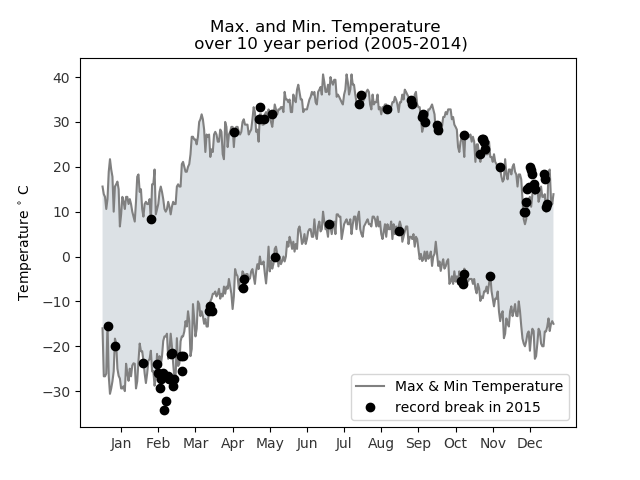

In [377]:
plt.figure()
plt.plot(tmax1_group['Data_Value'], label = 'Max & Min Temperature', color='grey') 
plt.plot(tmin1_group['Data_Value'], color='grey')


In [378]:
months = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
interval = int(len(tmax1_group.index.values)/12)
pos = (np.array(range(1,13))*(interval))-15 #-15 to shift the interval 15 points back so the month name is located in the mid loc
plt.xticks(pos, months, alpha=0.8);

In [379]:
plt.plot(tmax2_record['Data_Value'], 'o', label='record break in 2015', color='black')
plt.plot(tmin2_record['Data_Value'], 'o', color='black')

In [387]:
plt.legend()

In [381]:
plt.fill_between(
    range(len(tmax1_group.index.values)),
    tmax1_group['Data_Value'],
    tmin1_group['Data_Value'],
    facecolor = 'lightslategrey',
    alpha = 0.25
)

In [382]:
plt.title('Max. and Min. Temperature \n over 10 year period (2005-2014)')

Text(0.5, 1, 'Max. and Min. Temperature \n over 10 year period (2005-2014)')

In [383]:
plt.ylabel('Temperature $^{\circ}$ C')

Text(35.472222222222214, 0.5, 'Temperature $^{\\circ}$ C')

In [385]:
plt.yticks(alpha=0.8)

(array([-40., -30., -20., -10.,   0.,  10.,  20.,  30.,  40.,  50.]),
 <a list of 10 Text yticklabel objects>)

In [389]:
plt.savefig('visualization.jpg')

In [390]:
plt.savefig('visualization.svg')

In [391]:
plt.savefig('visualization.pdf')